<a href="https://colab.research.google.com/github/talgalper/Honours-2021/blob/main/plot_ratio_sequenced_vs_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Honours/owid-covid-data.csv")

In [6]:
# data check
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [7]:
# data check
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
count,9.939800e+04,99395.000000,98385.000000,8.914700e+04,89303.000000,98385.000000,98870.000000,98867.000000,97862.000000,88632.000000,88788.000000,97862.000000,82967.000000,10706.000000,10706.000000,12931.000000,12931.000000,952.000000,952.000000,1617.000000,1617.000000,4.615500e+04,4.581300e+04,45813.000000,46155.000000,5.373400e+04,53734.000000,50221.000000,49591.000000,1.841800e+04,1.751200e+04,1.465900e+04,1.537000e+04,3.200300e+04,18418.000000,17512.000000,14659.000000,32003.000000,86471.000000,1.026510e+05,95963.000000,92198.000000,91164.000000,91689.000000,92582.000000,62420.000000,92568.000000,95011.000000,72373.000000,71318.000000,46513.000000,84289.000000,98108.000000,92695.000000,3624.000000
mean,1.128530e+06,6071.859269,6087.466491,3.015774e+04,145.653192,131.518863,13930.602421,76.571170,76.762328,304.991249,1.542136,1.391729,1.005367,1008.097609,24.912674,4493.836362,163.815951,254.678202,19.573056,3441.799207,105.252401,4.887439e+04,8.233866e+06,332.792868,2.171840,4.635208e+04,2.079428,0.088314,165.232151,3.724943e+07,2.058451e+07,1.149218e+07,7.117292e+05,3.447742e+05,27.281300,17.625903,11.497481,3341.014530,58.079898,1.242029e+08,388.621839,30.554361,8.784085,5.560314,19283.646584,13.423714,258.639386,7.939837,10.574682,32.702599,50.813140,3.026808,73.238316,0.727182,18.218438
std,7.690264e+06,37745.245033,37442.473697,1.800223e+05,796.692721,741.600206,25256.964705,200.536579,158.693938,545.739267,3.948481,3.023247,0.353958,2804.163817,26.775866,11653.921043,207.956915,550.284015,34.672637,10625.755952,211.517878,1.783699e+05,3.569402e+07,788.571949,6.045135,1.627420e+05,5.147669,0.097181,889.445629,2.025560e+08,1.132436e+08,5.700748e+07,3.320216e+06,2.265303e+06,33.627423,19.759457,15.255759,4518.191445,20.955521,6.784878e+08,1810.083984,9.130184,6.208024,4.234697,20011.532691,19.966732,119.100190,4.165523,10.476866,13.488754,31.757847,2.457604,7.557981,0.150353,35.742831
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-6.320000,0.000000e+00,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,4.700000e+01,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-95.590000
25%,1.381000e+03,2.000000,7.714000,5.700000e+01,0.000000,0.000000,273.674250,0.224000,1.321000,8.388000,0.000000,0.000000,0.840000,30.000000,4.002250,111.000000,22.267000,7.985000,1.779000,46.914000,9.009000,1.711000e+03,1.712370e+05,15.133000,0.149000,1.802000e+03,0.149000,0.016000,7.700000,1.382788e+05,1.110228e+05,5.581050e+04,4.738000e+03,8.850000e+0

In [8]:
data.date = pd.to_datetime(data.date)

In [9]:
# data check
data.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
103339   2021-07-14
103340   2021-07-15
103341   2021-07-16
103342   2021-07-17
103343   2021-07-18
Name: date, Length: 103344, dtype: datetime64[ns]

In [10]:
data.location = data.location.astype('category')
data.continent = data.continent.astype('category')

In [11]:
# data check
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103339,ZWE,Africa,Zimbabwe,2021-07-14,76381.0,3110.0,2307.714,2332.0,58.0,51.286,5139.028,209.245,155.266,156.900,3.902,3.451,1.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12604.0,779064.0,52.417,0.848,10143.0,0.682,0.228,4.4,tests performed,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
103340,ZWE,Africa,Zimbabwe,2021-07-15,78872.0,2491.0,2355.571,2418.0,86.0,55.571,5306.626,167.598,158.486,162.687,5.786,3.739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1666862.0,1036252.0,630610.0,53222.0,33326.0,11.21,6.97,4.24,2242.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
103341,ZWE,Africa,Zimbabwe,2021-07-16,81168.0,2296.0,2300.286,2520.0,102.0,62.286,5461.105,154.478,154.767,169.549,6.863,4.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.5

In [12]:
subset_data = data[["continent", "location", "date", "new_cases"]]
subset_data = subset_data[subset_data.location == "World"]
subset_data = subset_data.dropna(subset=["new_cases"])
subset_data.new_cases = subset_data.new_cases.astype('int64')
subset_data.index = subset_data.date

In [13]:
# data check
subset_data

,continent,location,date,new_cases
date,,,,
2020-01-22,NaN,World,2020-01-22,0
2020-01-23,NaN,World,2020-01-23,98
2020-01-24,NaN,World,2020-01-24,286
2020-01-25,NaN,World,2020-01-25,492
2020-01-26,NaN,World,2020-01-26,685
...,...,...,...,...
2021-07-14,NaN,World,2021-07-14,540104
2021-07-15,NaN,World,2021-07-15,569347
2021-07-16,NaN,World,2021-07-16,599949


In [14]:
sum_months = subset_data.groupby(pd.Grouper(freq='M')).sum()
sum_months = sum_months.reset_index()
sum_months

,date,new_cases
0,2020-01-31,9370
1,2020-02-29,76087
2,2020-03-31,790499
3,2020-04-30,2405681
4,2020-05-31,2906074
5,2020-06-30,4269652
6,2020-07-31,7146907
7,2020-08-31,7904244
8,2020-09-30,8504362
9,2020-10-31,12129873


In [15]:
gisaid_data = pd.read_excel('/content/drive/MyDrive/Honours/gisaid_monthly_submissions_global_2021-07-16-0358.xlsx')
gisaid_data.drop('country_total', axis=1, inplace=True)
gisaid_data.drop(188, inplace=True)
gisaid_data

,Unnamed: 0,01/2020,02/2020,03/2020,04/2020,05/2020,06/2020,07/2020,08/2020,09/2020,10/2020,11/2020,12/2020,01/2021,02/2021,03/2021,04/2021,05/2021,06/2021,07/2021
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,1,0,29,0,0,0,0
2,Algeria,0,0,2,1,0,0,0,0,0,0,0,0,15,4,7,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,71,118,0,533,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Venezuela,0,0,0,0,0,3,0,0,9,0,0,0,0,0,0,101,15,20,0
184,Vietnam,0,1,7,0,20,25,26,8,0,0,27,0,28,9,6,0,1,87,1
185,Wallis and Futuna,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0
186,Zambia,0,0,0,0,0,0,1,0,0,0,0,0,1,219,0,0,0,38,433


In [16]:
gisaid_data = gisaid_data.melt(id_vars=('Unnamed: 0'))

In [17]:
gisaid_data.columns = ['Country', 'Month', 'Sequenced']

In [18]:
gisaid_data.Month = pd.to_datetime(gisaid_data.Month)

In [19]:
# data check
gisaid_data

,Country,Month,Sequenced
0,Afghanistan,2020-01-01,0
1,Albania,2020-01-01,0
2,Algeria,2020-01-01,0
3,Andorra,2020-01-01,0
4,Angola,2020-01-01,0
...,...,...,...
3567,Venezuela,2021-07-01,0
3568,Vietnam,2021-07-01,1
3569,Wallis and Futuna,2021-07-01,0
3570,Zambia,2021-07-01,433


In [20]:
gisaid_data.index = gisaid_data.Month
sum_months_gisaid = gisaid_data.groupby(pd.Grouper(freq='M')).sum()
sum_months_gisaid = sum_months_gisaid.reset_index()
sum_months_gisaid

,Month,Sequenced
0,2020-01-31,67
1,2020-02-29,185
2,2020-03-31,2944
3,2020-04-30,12482
4,2020-05-31,20058
5,2020-06-30,21797
6,2020-07-31,18215
7,2020-08-31,17443
8,2020-09-30,38602
9,2020-10-31,39107


In [21]:
merged_months = sum_months.merge(sum_months_gisaid, how='outer', left_on='date', right_on='Month')
merged_months['percent_sequenced'] =  merged_months.Sequenced / merged_months.new_cases * 100
merged_months

,date,new_cases,Month,Sequenced,percent_sequenced
0,2020-01-31,9370,2020-01-31,67,0.715048
1,2020-02-29,76087,2020-02-29,185,0.243143
2,2020-03-31,790499,2020-03-31,2944,0.372423
3,2020-04-30,2405681,2020-04-30,12482,0.518855
4,2020-05-31,2906074,2020-05-31,20058,0.690210
5,2020-06-30,4269652,2020-06-30,21797,0.510510
6,2020-07-31,7146907,2020-07-31,18215,0.254865
7,2020-08-31,7904244,2020-08-31,17443,0.220679
8,2020-09-30,8504362,2020-09-30,38602,0.453908
9,2020-10-31,12129873,2020-10-31,39107,0.322402


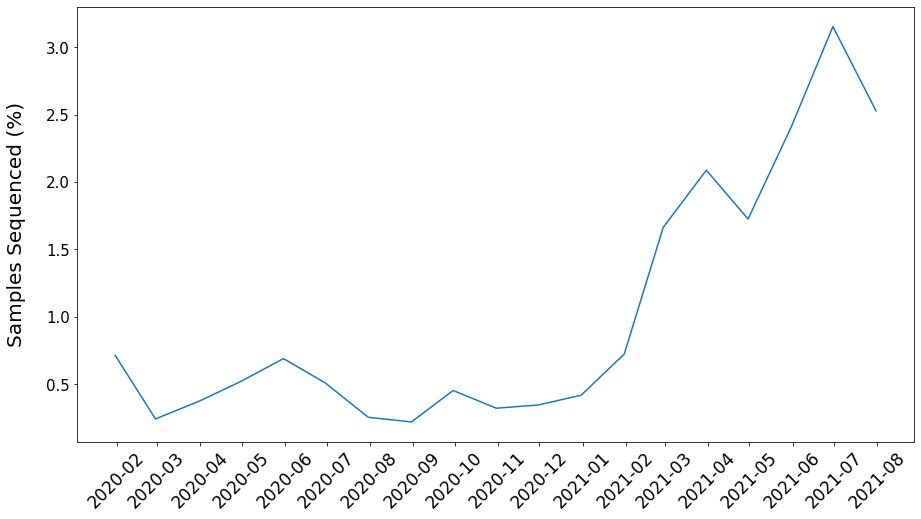

In [27]:
fig, ax = plt.subplots()

plt.xticks(rotation=45, fontsize=17)
plt.yticks(fontsize=15)
fig.set_size_inches(15, 8)
ax.plot(merged_months.date, merged_months.percent_sequenced)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
ax.set_ylabel("Samples Sequenced (%)", labelpad=20, fontsize=20)

fig.show()

In [28]:
fig.savefig('Ratio_genomes_sequenced_vs_cases')

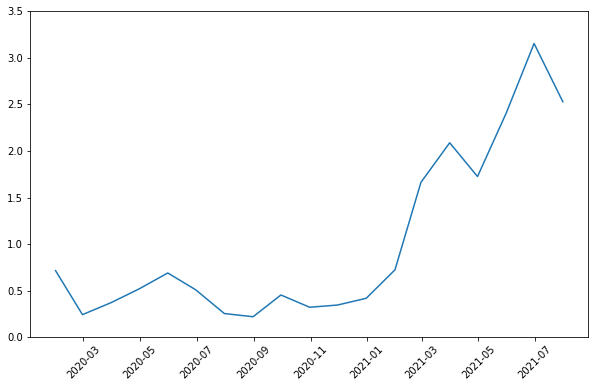

In [24]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(6)

plt.plot(merged_months.date, merged_months.percent_sequenced)

plt.xticks(rotation = 45)
plt.ylim((0, 3.5))
#plt.xlim([pd.to_datetime('2020-01-31'), pd.to_datetime('2021-07-31')])

# show all xticks
# save as png
# label y axis

plt.show()


In [ ]:
# An example of how we would use the 'monthly total' row instead of summing up all countries.
gisaid_data = pd.read_excel('gisaid_monthly_submissions_global_2021-07-16-0358.xlsx')
gisaid_data.drop('country_total', axis=1, inplace=True)
gisaid_data = gisaid_data[gisaid_data['Unnamed: 0'] == 'monthly total:']
gisaid_data.melt('Unnamed: 0').drop('Unnamed: 0', axis=1)